# UDACITY -- Self-Driving Car Engineer [NanoDegree] --
# Part-1--Project-04 - **ADVANCED LANE FINDING**

## GOALS/STEPS OF THE PROJECT
1. Camera Calibration.
2. Image Distortion Correction.
3. Image Color & Gradient Thresholding.
4. Image Perspective Transform.
5. Detect Lane Lines.
6. Determine the Lane Curvature & Relative Position of Vehicle in the Lane.


## IMPORT PROJECT DEPENDENCIES

In [1]:
### IMPORT PROJECT DEPENDENCIES
import numpy as np
import cv2
import glob
import pickle
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib qt

## 1. CAMERA CALIBRATION

### Step 1: Define ObjectPoints & Extract ImagePoints For Camera Calibration

In [2]:
### PARAMETERS
# CHESSBOARD PATTERN Used For CALIBRATION
# NUMBER Of CORNERS In CHESSBOARD PATTERN Used: 6 x 9 (ny x nx)
nx = 9 # Number of Inside Corners in x.
ny = 6 # Number of Inside Corners in y.

### Arrays To Store Actually Detected Object Points & Image Points
### From All The Calibration Images
object_points_detected = [] # 3-D Points In Real-World Space.
image_points_detected  = [] # 2-D Points In Image Plane.

### REAL-WORLD ACTUAL CHESSBOARD PATTERN -- OBJECT POINTS
# Prepare Object Points - Like (0,0,0), (1,0,0), (2,0,0), ..., (8,5,0)
object_points       = np.zeros((ny*nx,3), np.float32)
object_points[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)

### CAMERA IMAGES OF CHESSBOARD PATTERN -- IMAGE POINTS
# Make a List of Calibration Images
images_calib = glob.glob('./Camera_Cal/calibration*.jpg')
# Step Through The List and Search For ChessBoard Corners
for idx, fname in enumerate(images_calib):
    # Read the Image File & Convert To GrayScale
    img      = cv2.imread(fname)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the ChessBoard Corners
    ret, corners = cv2.findChessboardCorners(img_gray, (nx,ny), None)
    
    # If Corners are Successfully Found,
    # Then Add corresponding Object Points & Image Points To Detection Arrays
    if (True == ret):
        object_points_detected.append(object_points)
        image_points_detected.append(corners)
        
        # Draw and Display the Detected Corners
        print("OK!: CHESSBOARD CORNERS Found In: ", fname)
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        cv2.imshow('Detected Corners', img)
        cv2.waitKey(1000)
        
        # Optional Step: Save the Corners Detected Image For Later Analysis
        #write_file_name = 'corners_'+fname+'.jpg'
        #cv2.imwrite(write_file_name, img)
    else:
        print("ERROR!: CHESSBOARD CORNERS Not Found In: ", fname)

cv2.destroyAllWindows() # Close the Detection Images Display.


ERROR!: CHESSBOARD CORNERS Not Found In:  ./Camera_Cal\calibration1.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration10.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration11.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration12.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration13.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration14.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration15.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration16.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration17.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration18.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration19.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration2.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration20.jpg
OK!: CHESSBOARD CORNERS Found In:  ./Camera_Cal\calibration3.jpg
ERROR!: CHESSBOARD CORNERS Not Found In:  ./Camera_Cal\calibration4.jpg


### Step 2: Calibrate Camera
**1. Calc Camera Matrix & Distortion Co-efficients**  
**2. Test UnDistortion**  
**3. Save Camera Calibration Data For Later Use**


cv2.calibrateCamera() retval:  1.18689740456537


OK!: CAMERA CALIBRATED & CAMERA CALIBRATION DATA SAVED!


src_corner_left_top     :  [[ 191.49125671   60.40036774]]
src_corner_right_top    :  [[ 1037.84411621    71.5462265 ]]
src_corner_right_bottom :  [[ 1147.37756348   567.421875  ]]
src_corner_left_bottom  :  [[  93.57233429  580.75256348]]


dest_corner_left_top     :  [ 71.1111145  71.1111145]
dest_corner_right_top    :  [ 1208.88891602    71.1111145 ]
dest_corner_right_bottom :  [ 1208.88891602   648.88891602]
dest_corner_left_bottom  :  [  71.1111145   648.88891602]



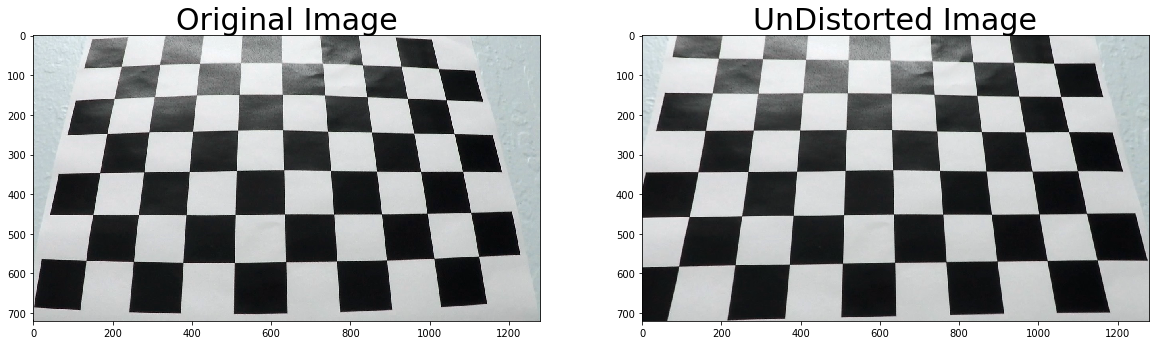

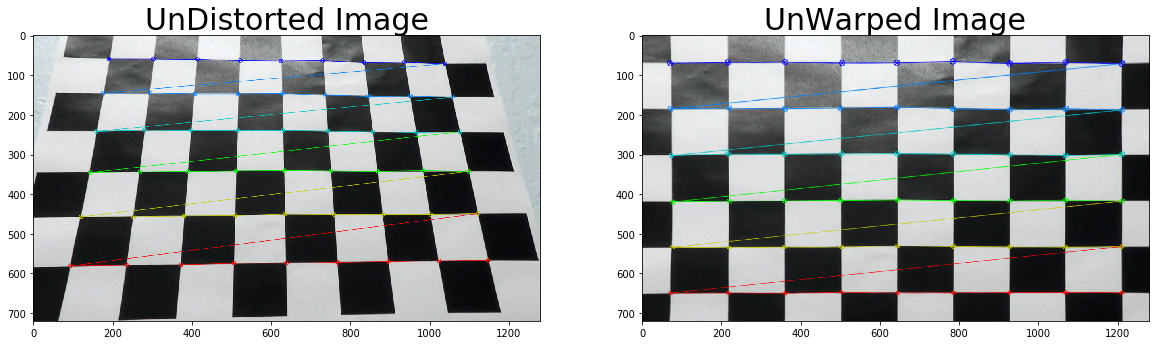

In [3]:
### Read-In a Test Image
image      = cv2.imread('./Camera_Cal/calibration3.jpg')
image_size = (image.shape[1], image.shape[0]) # img.shape[1::-1]

### 1. Calc Camera Matrix & Distortion Co-efficients
# Do Camera Calibration, Given Object Points & Image Points
retval, matrix, distort_coeff, rvecs, tvecs = cv2.calibrateCamera(object_points_detected, 
                                                                  image_points_detected, 
                                                                  image_size, None, None)
print()
print("cv2.calibrateCamera() retval: ", retval)
print()

### 2. Test UnDistortion
if (retval > 0): # NOTE!: retval of cv2.calibrateCamera() was 1.186...! So (True == retval) WON'T WORK!!!
    image_undistorted = cv2.undistort(image, matrix, distort_coeff, None, matrix)
    cv2.imwrite('./Camera_Cal/undistorted_calibration3.jpg',image_undistorted)
else:
    assert False, ("ERROR!: Check For Error In cv2.calibrateCamera()")

### 3. Save CAMERA CALIBRATION DATA For Later Use [We Ignore `rvecs` & `tvecs`]
cam_cal_pickle = {}
cam_cal_pickle["matrix"]        = matrix
cam_cal_pickle["distort_coeff"] = distort_coeff
pickle.dump(cam_cal_pickle, open("./Camera_Cal/cam_cal_pickle.p", "wb"))
print()
print("OK!: CAMERA CALIBRATED & CAMERA CALIBRATION DATA SAVED!")
print()

### VISUALIZE UNDISTORTION
#cv2.imshow('UnDistorted Image', image_undistorted)
#image_undistorted = cv2.cvtColor(image_undistorted, cv2.COLOR_BGR2RGB)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(image_undistorted)
ax2.set_title('UnDistorted Image', fontsize=30)


### Additional Step: UnWarp the UnDistorted Image & Check
### FUNCTION To UNWARP an Input IMAGE of UNDISTORTED ChessBoard Pattern CORNERS and Return the UnWarped Image
def image_corners_unwarp(image_undistorted, nx, ny):
    ### 1) Convert To GrayScale
    image_gray = cv2.cvtColor(image_undistorted, cv2.COLOR_BGR2GRAY)
    
    ### 2) Find the ChessBoard Corners
    ret, corners = cv2.findChessboardCorners(image_gray, (nx,ny), None)
    
    ### 3) If Corners Found, UnWarp the Image, using the following Steps:
         # a) Draw the Corners.
         # b) Define 4 Source Points src = np.float32([[,],[,],[,],[,]]).
         #    NOTE: Pick Any 4 of the Detected Corners as long as they Define a Rectangle.
         #          One especially Smart Way to do this is to Use 4 Well-chosen Corners
         #          that were Automatically Detected by cv2 in the ChessBoard Pattern.
         # c) Define 4 Destination Points dest = np.float32([[,],[,],[,],[,]]).
         # d) Use cv2.getPerspectiveTransform() To Get M, the Transformation Matrix.
         # e) Use cv2.warpPerspective() To UnWarp the Image To a Perfect Top-Down View.
    if (True == ret):
        image_corners = cv2.drawChessboardCorners(image_undistorted, (nx,ny), corners, ret)
    else:
        assert False, ("ERROR!: Check For Error In cv2.findChessboardCorners()")
    
    # For Analysis
    #print()
    #print("Corners[]:")
    #print(corners)
    #print()
                                       # Corners[i] -> [[x y]]; Corners[i][0] -> [x y].
                                       # NOTE!: np.float32() Below!
    src_corner_left_top     = np.float32(corners[0])    # Index: Min x, Min y.
    src_corner_right_top    = np.float32(corners[nx-1]) # Index: Max x, Min y; Index of x is From 0,...
    src_corner_right_bottom = np.float32(corners[-1])   # Index: Max x, Max y; Last Entry Of 'corners[]'.
    src_corner_left_bottom  = np.float32(corners[-nx])  # Index: Min x, Max y; -1 -> Last x, -nx -> First x.
    print()
    print("src_corner_left_top     : ", src_corner_left_top)
    print("src_corner_right_top    : ", src_corner_right_top)
    print("src_corner_right_bottom : ", src_corner_right_bottom)
    print("src_corner_left_bottom  : ", src_corner_left_bottom)
    print()
    
    img_size_x = image_corners.shape[1]
    img_size_y = image_corners.shape[0]
    offset     = np.float32((image_corners.shape[1]/nx) / 2) # Length of 1/2 Square -> Offset From (0,0) To 1st Corner.
    dest_corner_left_top     = np.float32([offset, offset])
    dest_corner_right_top    = np.float32([img_size_x-offset, offset])
    dest_corner_right_bottom = np.float32([img_size_x-offset, img_size_y-offset])
    dest_corner_left_bottom  = np.float32([offset, img_size_y-offset])
    print()
    print("dest_corner_left_top     : ", dest_corner_left_top)
    print("dest_corner_right_top    : ", dest_corner_right_top)
    print("dest_corner_right_bottom : ", dest_corner_right_bottom)
    print("dest_corner_left_bottom  : ", dest_corner_left_bottom)
    print()
    
    src_points  = np.float32([ src_corner_left_top  , src_corner_right_top  , src_corner_right_bottom  , src_corner_left_bottom  ])
    dest_points = np.float32([ dest_corner_left_top , dest_corner_right_top , dest_corner_right_bottom , dest_corner_left_bottom ])
    
    M              = cv2.getPerspectiveTransform(src_points, dest_points)
    image_unwarped = cv2.warpPerspective(image_undistorted, M, img.shape[1::-1], flags=cv2.INTER_LINEAR)
    
    ### OUTPUT Of image_corners_unwarp(image_undistorted, nx, ny)
    return image_unwarped


### CALL FUNCTION image_corners_unwarp(image_undistorted, nx, ny)
image_unwarped = image_corners_unwarp(image_undistorted, nx, ny)

### VISUALIZE UNWARP
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image_undistorted)
ax1.set_title('UnDistorted Image', fontsize=30)
ax2.imshow(image_unwarped)
ax2.set_title('UnWarped Image', fontsize=30)


## 2. IMAGE DISTORTION CORRECTION (UNDISTORT)

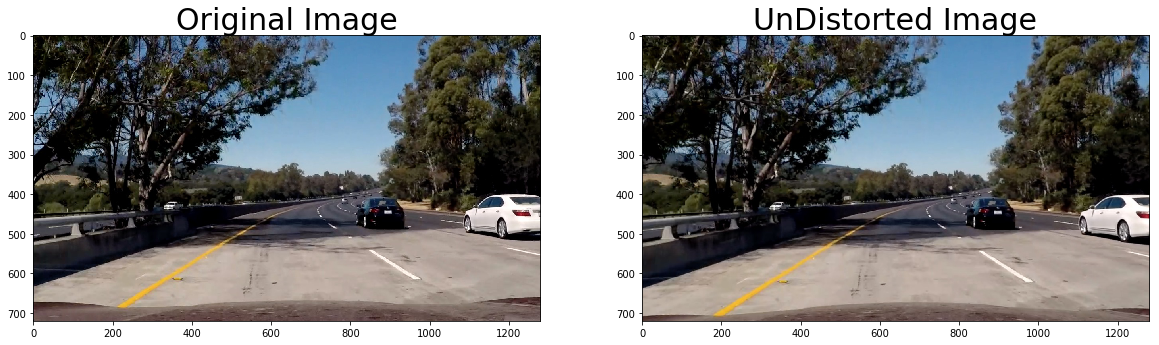

In [4]:
### Read-In the Saved CAMERA CALIBRATION DATA
cam_cal_pickle = pickle.load(open("./Camera_Cal/cam_cal_pickle.p", "rb"))
matrix         = cam_cal_pickle["matrix"]
distort_coeff  = cam_cal_pickle["distort_coeff"]

### FUNCTION To UNDISTORT an Input IMAGE and Return the UnDistorted Image
def image_undistort(image_in):
    ### UnDistort the Input Image
    image_undistorted = cv2.undistort(image_in, matrix, distort_coeff, None, matrix)
    
    ### OUTPUT Of image_undistort(image_in)
    return image_undistorted


### Read-In a Test Image
fpath    = './Test_Images/'
fname    = 'test5.jpg'
image_in = mpimg.imread(fpath+fname)

### CALL FUNCTION image_undistort(image_in) and See the Output
image_undistorted = image_undistort(image_in)
cv2.imwrite(fpath+'UnDistorted_'+fname, image_undistorted)

### VISUALIZE UNDISTORTION
#cv2.imshow('UnDistorted Image', image_undistorted)
#image_undistorted = cv2.cvtColor(image_undistorted, cv2.COLOR_BGR2RGB)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image_in)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(image_undistorted)
ax2.set_title('UnDistorted Image', fontsize=30)


## 3. IMAGE COLOR & GRADIENT THRESHOLDING [TO ENABLE LANE LINES DETECTION]

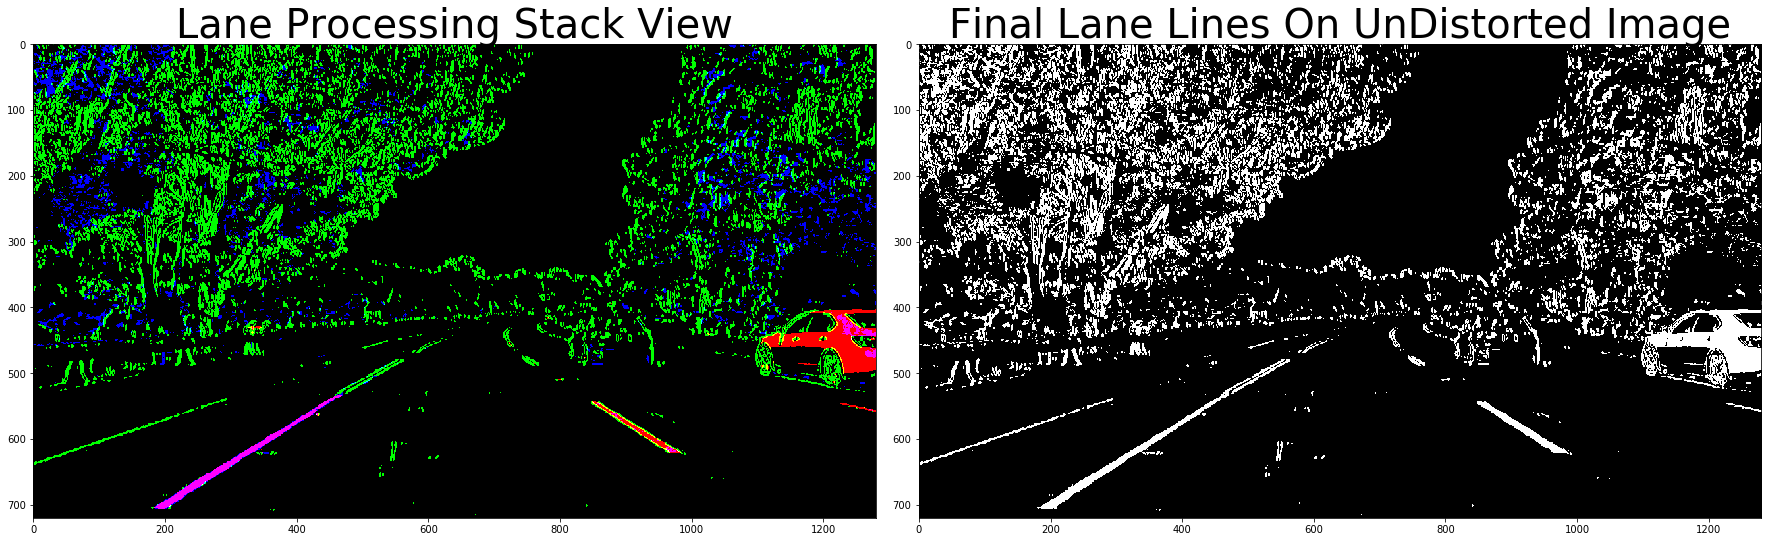

In [5]:
### FUNCTION To Calculate SOBEL x or y
def sobel_xory(img, orient='x', sobel_kernel=3):
    ### Applying the following Steps to `img`:
    ### 1) Convert To GrayScale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # We Use `cv2.COLOR_RGB2GRAY` as we have Read the Image through `mpimg.imread()`.
    ### 2) Take the Derivative in x or y given `orient` = 'x' or 'y'
    if ('x' == orient):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    elif ('y' == orient):
        sobel = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    else:
        assert False, ("Value of Parameter 'orient' is INVALID!")
    ### 3) RETURN SOBEL x or y
    return sobel


### FUNCTION To Calculate SOBEL x and y
def sobel_xy(img, sobel_kernel=3):
    ### Applying the following Steps to `img`:
    ### 1) Convert To GrayScale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # We Use `cv2.COLOR_RGB2GRAY` as we have Read the Image through `mpimg.imread()`.
    ### 2) Take the Gradient in x and y separately
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    ### 3) RETURN SOBEL x and y
    return sobel_x, sobel_y


### FUNCTION that Takes-In SOBEL x or y, Calculates ABSOLUTE Value, and Applies a THRESHOLD
def sobel_xory_abs_threshold(sobel_xory, sobel_thresh=(0, 255)):
    ### Applying the following Steps to `sobel_xory`:
    ### 1) Take the Absolute Value of the Derivative/Gradient
    sobel_abs = np.absolute(sobel_xory)
    ### 2) Scale To 8-bit (0 - 255), then Convert To Type = `np.uint8`
    sobel_scaled = np.uint8((255/np.max(sobel_abs))*sobel_abs)
    ### 3) Create a Mask of 1's where the Scaled Gradient Magnitude
    ###    is >= `thresh_min` and <= `thresh_max`
    sobel_binary = np.zeros_like(sobel_scaled)
    sobel_binary[(sobel_scaled >= sobel_thresh[0]) & (sobel_scaled <= sobel_thresh[1])] = 1
    ### 4) RETURN the SOBEL BINARY IMAGE
    return sobel_binary


### FUNCTION that Takes-In SOBEL x and y, Computes the Overall MAGNITUDE of the Gradient, and Applies a THRESHOLD
def sobel_xy_mag_threshold(sobel_x, sobel_y, sobel_mag_thresh=(0, 255)):
    ### Applying the following Steps to `sobel_x` and `sobel_y`:
    ### 1) Calculate the Overall Magnitude
    sobel_xy_mag = np.sqrt(np.square(sobel_x) + np.square(sobel_y))
    ### 2) Scale To 8-bit (0 - 255), and Convert To Type = `np.uint8`
    sobel_xy_scaled = np.uint8((255/np.max(sobel_xy_mag))*sobel_xy_mag)
    ### 3) Create a Binary Mask of 1's where `sobel_mag_thresh` are met
    sobel_xy_binary = np.zeros_like(sobel_xy_scaled)
    sobel_xy_binary[(sobel_xy_scaled >= sobel_mag_thresh[0]) & (sobel_xy_scaled <= sobel_mag_thresh[1])] = 1
    ### 4) RETURN the SOBEL BINARY IMAGE
    return sobel_xy_binary


### FUNCTION that Takes-In SOBEL x and y, Computes the Overall DIRECTION of the Gradient, and Applies a THRESHOLD
def sobel_xy_dir_threshold(sobel_x, sobel_y, sobel_dir_thresh=(0, np.pi/2)):
    ### Applying the following Steps to `sobel_x` and `sobel_y`:
    ### 1) Take the Absolute Value of the Sobel x and y Gradients
    sobel_x_abs = np.absolute(sobel_x)
    sobel_y_abs = np.absolute(sobel_y)
    ### 2) Use `np.arctan2(sobel_y_abs, sobel_x_abs)` to Calculate the Direction of the Gradient
    sobel_xy_dir = np.arctan2(sobel_y_abs, sobel_x_abs)
    ### 3) Create a Binary Mask of 1's where `sobel_dir_thresh` are met
    sobel_xy_binary = np.zeros_like(sobel_xy_dir)
    sobel_xy_binary[(sobel_xy_dir >= sobel_dir_thresh[0]) & (sobel_xy_dir <= sobel_dir_thresh[1])] = 1
    ### 4) RETURN the SOBEL BINARY IMAGE
    return sobel_xy_binary


### FUNCTION that Takes-In an RGB Image, Converts it To HLS, and THRESHOLDs the S-Channel of HLS
### Using Exclusive Lower Bound (>) and Inclusive Upper Bound (<=)
def hls_s_threshold(img, hls_s_thresh=(0, 255)):
    ### 1) Convert To HLS Color Space and Separate S-Channel
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) # We Use `cv2.COLOR_RGB2HLS` as we have Read the Image through `mpimg.imread()`.
    S = img_hls[:,:,2]
    ### 2) Apply Threshold To the S-Channel
    hls_s_binary = np.zeros_like(S)
    hls_s_binary[(S > hls_s_thresh[0]) & (S <= hls_s_thresh[1])] = 1
    ### 3) RETURN the THRESHOLDED BINARY IMAGE
    return hls_s_binary


### FUNCTION that Takes-In an RGB Image, Converts it To HLS, and THRESHOLDs the H-Channel of HLS
### Using Exclusive Lower Bound (>) and Inclusive Upper Bound (<=)
def hls_h_threshold(img, hls_h_thresh=(0, 255)):
    ### 1) Convert To HLS Color Space and Separate H-Channel
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) # We Use `cv2.COLOR_RGB2HLS` as we have Read the Image through `mpimg.imread()`.
    H = img_hls[:,:,0]
    ### 2) Apply Threshold To the H-Channel
    hls_h_binary = np.zeros_like(H)
    hls_h_binary[(H > hls_h_thresh[0]) & (H <= hls_h_thresh[1])] = 1
    ### 3) RETURN the THRESHOLDED BINARY IMAGE
    return hls_h_binary


### FUNCTION that Takes-In an RGB Image, Converts it To HLS, and THRESHOLDs Both the S-Channel & H-Channel of HLS
### Using Exclusive Lower Bound (>) and Inclusive Upper Bound (<=)
def hls_sh_threshold(img, hls_s_thresh=(0, 255), hls_h_thresh=(0, 255)):
    ### 1) Convert To HLS Color Space and Separate S-Channel & H-Channel
    img_hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS) # We Use `cv2.COLOR_RGB2HLS` as we have Read the Image through `mpimg.imread()`.
    S = img_hls[:,:,2]
    H = img_hls[:,:,0]
    ### 2) Apply Thresholds To the S-Channel & H-Channel
    hls_sh_binary = np.zeros_like(S)
    hls_sh_binary[( ((S > hls_s_thresh[0]) & (S <= hls_s_thresh[1])) & ((H > hls_h_thresh[0]) & (H <= hls_h_thresh[1])) )] = 1
    ### 3) RETURN the THRESHOLDED BINARY IMAGE
    return hls_sh_binary


######### PIPELINE - PROCESS LANES - Combined COLOR AND GRADIENT THRESHOLDING #########
# REFERENCE: sobel_thresh=(20, 100), hls_s_thresh=(170, 255)
def pipeline_lanes_color_and_grad_threshold(image_rgb):
    ### Take the RGB R-Channel, Apply Different Sobels, Then Apply the Corresponding Threshold
    R = image_rgb[:,:,0]
    image_rgb_r = np.dstack(( R, np.zeros_like(R), np.zeros_like(R) )) # R, G=0, B=0.
    # image_rgb_r = image_rgb

    rgb_r_sobel_x = sobel_xory(image_rgb_r, orient='x', sobel_kernel=7)
    rgb_r_sobel_y = sobel_xory(image_rgb_r, orient='y', sobel_kernel=7)
    rgb_r_sobel_x_abs_binary  = sobel_xory_abs_threshold(rgb_r_sobel_x, sobel_thresh=(24, 120))
    rgb_r_sobel_y_abs_binary  = sobel_xory_abs_threshold(rgb_r_sobel_y, sobel_thresh=(24, 120))
    rgb_r_sobel_xy_mag_binary = sobel_xy_mag_threshold(rgb_r_sobel_x, rgb_r_sobel_y, sobel_mag_thresh=(32, 128))
    rgb_r_sobel_xy_dir_binary = sobel_xy_dir_threshold(rgb_r_sobel_x, rgb_r_sobel_y, sobel_dir_thresh=(0.7, 1.2))

    rgb_r_sobel_combined = np.zeros_like(R)
    rgb_r_sobel_combined[((rgb_r_sobel_x_abs_binary == 1))] = 1
    # rgb_r_sobel_combined[((rgb_r_sobel_x_abs_binary == 1) & (rgb_r_sobel_y_abs_binary == 1))] = 1
    # rgb_r_sobel_combined[((rgb_r_sobel_xy_mag_binary == 1))] = 1
    # rgb_r_sobel_combined[((rgb_r_sobel_xy_mag_binary == 1) & (rgb_r_sobel_xy_dir_binary == 1))] = 1
    # rgb_r_sobel_combined[((rgb_r_sobel_x_abs_binary == 1) & (rgb_r_sobel_y_abs_binary == 1)) | ((rgb_r_sobel_xy_mag_binary == 1) & (rgb_r_sobel_xy_dir_binary == 1))] = 1

    ### HLS Thresholding
    """
    ## HLS S Thresholding
    hls_s_thresh_bin = hls_s_threshold(image_rgb, hls_s_thresh=(160, 255))
    ## HLS H Thresholding
    hls_h_thresh_bin = hls_h_threshold(image_rgb, hls_h_thresh=(16, 96))
    ## Combine HLS Thresholding
    hls_thresh_bin = np.zeros_like(R)
    # hls_thresh_bin[((hls_s_thresh_bin == 1))] = 1
    hls_thresh_bin[((hls_s_thresh_bin == 1) & (hls_h_thresh_bin == 1))] = 1
    """
    ## HLS S&H Thresholding
    hls_thresh_bin = hls_sh_threshold(image_rgb, hls_s_thresh=(160, 255), hls_h_thresh=(16, 96))

    ### RGB R Direct Thresholding - Especially To Get Fillings Inside White Line Segments' Boundaries!
    rgb_r_thresh=(224,255)
    rgb_r_binary = np.zeros_like(R)
    rgb_r_binary[(R >= rgb_r_thresh[0]) & (R <= rgb_r_thresh[1])] = 1

    ### Stack Each Output For Viewing
    # lanes_proc_pipeline_view = np.dstack(( rgb_r_sobel_combined, np.zeros_like(R), hls_thresh_bin )) * 255 # R=RGB-R_Gradient, G=0, B=HLS.
    lanes_proc_pipeline_view = np.dstack(( rgb_r_binary, rgb_r_sobel_combined, hls_thresh_bin )) * 255 # R=RGB-R, G=RGB-R_Gradient, B=HLS.

    ### PREPARE OUTPUT Of LANE LINES PROCESSING
    lanes_proc_output = np.zeros_like(R)
    # lanes_proc_output[(rgb_r_sobel_combined == 1) | (hls_thresh_bin == 1)] = 1
    lanes_proc_output[(rgb_r_binary == 1) | (rgb_r_sobel_combined == 1) | (hls_thresh_bin == 1)] = 1

    ### OUTPUT Of pipeline_lanes_color_and_grad_threshold(image_rgb)
    return lanes_proc_output, lanes_proc_pipeline_view


### CALL the PIPELINE To PROCESS LANE LINES On the Earlier `image_undistorted` and See the Output
adv_lane_lines, lanes_proc_pipeline_view = pipeline_lanes_color_and_grad_threshold(image_undistorted)

### VISUALIZE The RESULTS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
fig.tight_layout()
ax1.imshow(lanes_proc_pipeline_view)
ax1.set_title('Lane Processing Stack View', fontsize=40)
ax2.imshow(adv_lane_lines, cmap='gray')
ax2.set_title('Final Lane Lines On UnDistorted Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()


## 4. IMAGE PERSPECTIVE TRANSFORM [TO ENABLE LANE LINES DETECTION]


src_point_left_top     :  [ 581.  460.]
src_point_right_top    :  [ 704.  460.]
src_point_right_bottom :  [ 1042.   680.]
src_point_left_bottom  :  [ 267.  680.]


dest_point_left_top     :  [ 267.    0.]
dest_point_right_top    :  [ 1042.     0.]
dest_point_right_bottom :  [ 1042.   680.]
dest_point_left_bottom  :  [ 267.  680.]


OK!: PERSPECTIVE TRANSFORM & INVERSE PERSPECTIVE TRANSFORM MATRICES
     FOR VIEWING LANES IN BIRD's-EYE VIEW ARE CALCULATED & STORED!



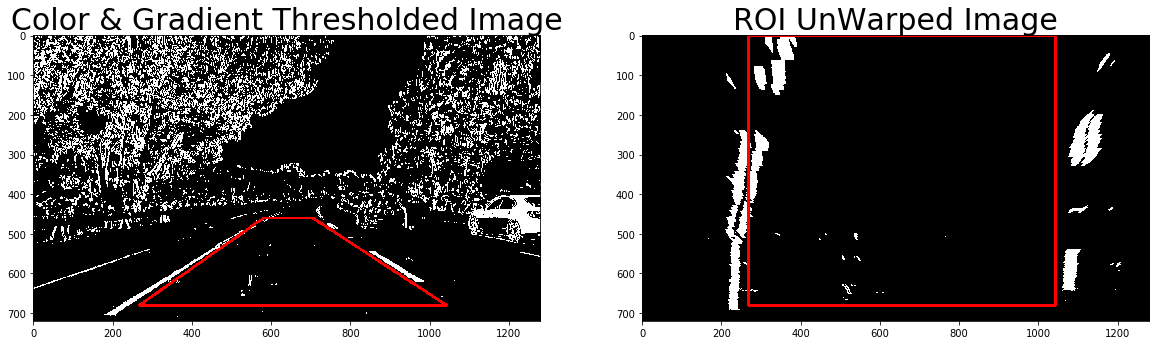

In [6]:
### FUNCTION To COMPUTE PERSPECTIVE TRANSFORM & INVERSE PERSPECTIVE TRANSFORM MATRICES
### NOTE!: The PARAMETERS BELOW Are For The GIVEN CAM & IMAGE RES [720x1280] In This PROJECT!
M    = [] # GLOBAL VAR!: PERSPECTIVE TRANSFORM MATRIX.
Minv = [] # GLOBAL VAR!: INVERSE PERSPECTIVE TRANSFORM MATRIX.
def compute_perspective_transform_matrices():
    ### Compute The Perspective Transform Matrices using the following Steps:
      # a) Define 4 Source Points src = np.float32([[,],[,],[,],[,]]).
      # b) Define 4 Destination Points dest = np.float32([[,],[,],[,],[,]]).
      #    NOTE: From './Test_Images/straight_lines1.jpg' &
      #               './Test_Images/straight_lines2.jpg',
      #          UNDISTORTED & Chose 4 Points [Average] Which Would Form A Perfect Rectangle
      #          In Ego-Lane In Top-Down View:
      #    -------------------------------------------------------------------------------
      #     straight_lines1.jpg | straight_lines2.jpg | Src Pts Average | Destination Pts
      #    -------------------------------------------------------------------------------
      #       582, 460          |   579, 460          |   581, 460      |   267,   0
      #       702, 460          |   705, 460          |   704, 460      |  1042,   0
      #      1040, 680          |  1044, 680          |  1042, 680      |  1042, 680
      #       264, 680          |   270, 680          |   267, 680      |   267, 680
      #    -------------------------------------------------------------------------------
      # c) Use cv2.getPerspectiveTransform() To Get M, the Transformation Matrix.
      # d) Use cv2.warpPerspective() To UnWarp the Image To a Perfect Top-Down View.
    src_point_left_top     = np.float32([ 581, 460])
    src_point_right_top    = np.float32([ 704, 460])
    src_point_right_bottom = np.float32([1042, 680])
    src_point_left_bottom  = np.float32([ 267, 680])
    print()
    print("src_point_left_top     : ", src_point_left_top)
    print("src_point_right_top    : ", src_point_right_top)
    print("src_point_right_bottom : ", src_point_right_bottom)
    print("src_point_left_bottom  : ", src_point_left_bottom)
    print()
    
    dest_point_left_top     = np.float32([ 267,   0])
    dest_point_right_top    = np.float32([1042,   0])
    dest_point_right_bottom = np.float32([1042, 680])
    dest_point_left_bottom  = np.float32([ 267, 680])
    print()
    print("dest_point_left_top     : ", dest_point_left_top)
    print("dest_point_right_top    : ", dest_point_right_top)
    print("dest_point_right_bottom : ", dest_point_right_bottom)
    print("dest_point_left_bottom  : ", dest_point_left_bottom)
    print()
    
    src_points  = np.float32([ src_point_left_top  , src_point_right_top  , src_point_right_bottom  , src_point_left_bottom  ])
    dest_points = np.float32([ dest_point_left_top , dest_point_right_top , dest_point_right_bottom , dest_point_left_bottom ])
    
    M    = cv2.getPerspectiveTransform(src_points, dest_points)
    Minv = cv2.getPerspectiveTransform(dest_points, src_points)
    
    ### OUTPUT Of compute_perspective_transform_matrices()
    return M, Minv

### CALL FUNCTION compute_perspective_transform_matrices()
### To COMPUTE & STORE PERSPECTIVE TRANSFORM MATRICES
M, Minv = compute_perspective_transform_matrices()
print()
print("OK!: PERSPECTIVE TRANSFORM & INVERSE PERSPECTIVE TRANSFORM MATRICES")
print("     FOR VIEWING LANES IN BIRD's-EYE VIEW ARE CALCULATED & STORED!")
print()


### FUNCTION To UNWARP an Input UNDISTORTED IMAGE Of LANES and Return the UnWarped Image
def lanes_image_unwarp(image_undistorted):
    image_unwarped = cv2.warpPerspective(image_undistorted, M, image_undistorted.shape[1::-1], flags=cv2.INTER_LINEAR)
    ### OUTPUT Of lanes_image_unwarp(image_undistorted)
    return image_unwarped


### CALL FUNCTION lanes_image_unwarp(image_undistorted)
# image_unwarped_binary = lanes_image_unwarp(image_undistorted)
image_unwarped_binary = lanes_image_unwarp(adv_lane_lines)
image_unwarped_file = np.dstack((image_unwarped_binary, image_unwarped_binary, image_unwarped_binary))*255
cv2.imwrite(fpath+'UnWarped_'+fname, image_unwarped_file)

### VISUALIZE UNWARP
## Draw The Reference Points Onto The Source & Destination Images
adv_lane_lines_visual = np.dstack((adv_lane_lines, adv_lane_lines, adv_lane_lines))*255
src_pts = np.array([[581,460],[704,460],[1042,680],[267,680]], np.int32)
src_pts = src_pts.reshape((-1,1,2))
cv2.polylines(adv_lane_lines_visual,[src_pts],True,(255,0,0),thickness=6) # RED Color Lines.

image_unwarped_visual = np.dstack((image_unwarped_binary, image_unwarped_binary, image_unwarped_binary))*255
dest_pts = np.array([[267,0],[1042,0],[1042,680],[267,680]], np.int32)
dest_pts = dest_pts.reshape((-1,1,2))
cv2.polylines(image_unwarped_visual,[dest_pts],True,(255,0,0),thickness=6) # RED Color Lines.

## Visualize The Images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
#ax1.imshow(image_undistorted)
#ax1.set_title('UnDistorted Image', fontsize=30)
#ax1.imshow(adv_lane_lines, cmap='gray')
ax1.imshow(adv_lane_lines_visual)
ax1.set_title('Color & Gradient Thresholded Image', fontsize=30)
#ax2.imshow(image_unwarped_binary, cmap='gray')
ax2.imshow(image_unwarped_visual)
ax2.set_title('ROI UnWarped Image', fontsize=30)


## 5. DETECT LANE LINES [SLIDING WINDOWS & SEARCH FROM PRIOR]

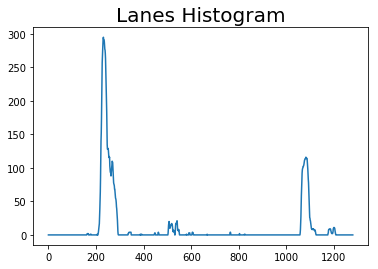

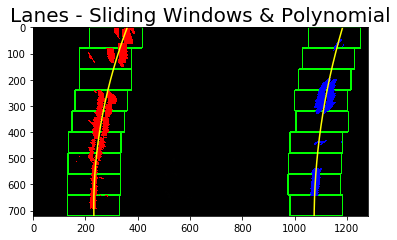

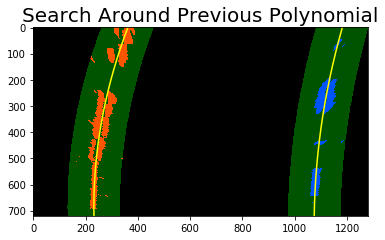

In [7]:
######### PIPELINE - FIND LANE LINES - DETECTION FUNCTIONS #########
### FEATURE SWITCHES
SWITCH_lanes_find_lines_VISUALIZATION   = True # Default = `True` Here.
SWITCH_search_around_poly_VISUALIZATION = True # Default = `True` Here.


### FUNCTION To Calc Histogram Of Image Pixels And FIND LANE LINES Using Sliding Windows
def lanes_find_lines(image_unwarped_binary):
    ### For Input - 'UnWarped Binary Image' of Lanes, Calculate a Histogram of the Bottom Half of the Image
    lanes_histogram  = np.sum(image_unwarped_binary[image_unwarped_binary.shape[0]//2:,:], axis=0)
    if (True == SWITCH_lanes_find_lines_VISUALIZATION):
        plt.plot(lanes_histogram)
        plt.title('Lanes Histogram', fontsize=20)
        plt.show()

    ### Split the Histogram Vertically For the 2 Lane Lines
    ### And Find the Peak of the Left & Right Halves of the Histogram -> Starting Points for the Left & Right Lane Lines
    img_midpoint     = np.int(lanes_histogram.shape[0]//2)
    left_peak_xbase  = np.argmax(lanes_histogram[:img_midpoint])
    right_peak_xbase = np.argmax(lanes_histogram[img_midpoint:]) + img_midpoint

    ### Set-up the Sliding Windows and Windows' HyperParameters
    ## HYPERPARAMETERS
    # Choose the Number of Sliding Windows
    num_windows = 9
    # Set the Width of the Windows +/- Margin
    window_margin = 100
    # Set the Height of the Windows - Based On Image Shape & `num_windows`
    window_height = np.int(image_unwarped_binary.shape[0]//num_windows)
    # Current Positions of the Windows - To Be Updated Later For Each Window in `num_windows` and Use For Tracking
    left_peak_xcurrent   = left_peak_xbase
    right_peak_xcurrent  = right_peak_xbase
    # Set the Minimum Number of Pixels If Found Will Recenter a Window
    windows_recenter_minpix = 50
    # Identify the x and y Positions of All Non-Zero (i.e., Actual Activated) Pixels in the 'UnWarped Binary Image'
    img_pixels_nonzero   = image_unwarped_binary.nonzero()
    img_pixels_nonzero_y = np.array(img_pixels_nonzero[0])
    img_pixels_nonzero_x = np.array(img_pixels_nonzero[1])
    # Create Empty Lists To Receive Left & Rigt Lane Pixel Indices Falling Within the Windows
    left_lane_pixels_indxs  = []
    right_lane_pixels_indxs = []
    ### Create an Output Image to Draw On & Visualize the Result
    if (True == SWITCH_lanes_find_lines_VISUALIZATION):
        # image_out = np.dstack((image_unwarped_binary, image_unwarped_binary, image_unwarped_binary))*255
        image_out = np.dstack((image_unwarped_binary, image_unwarped_binary, image_unwarped_binary))

    ### Iterate Through `num_windows` To Track Lane Curvature
    for window in range(num_windows): # Loop Through Each Window in `num_windows`.
        # 1) Find the Boundaries of the Current Window in x and y [And Left & Right]
        #    Based On `left_peak_xcurrent`, `right_peak_xcurrent`, as well as `window_margin`
        window_y_bottom = image_unwarped_binary.shape[0] - ((window+1) * window_height)
        # window_y_top  = image_unwarped_binary.shape[0] - (window * window_height)
        window_y_top    = window_y_bottom + window_height
        window_xleft_low   = left_peak_xcurrent  - window_margin
        window_xleft_high  = left_peak_xcurrent  + window_margin
        window_xright_low  = right_peak_xcurrent - window_margin
        window_xright_high = right_peak_xcurrent + window_margin
        
        # 2) Draw the Window Boundaries Onto the Visualization Image `image_out`
        if (True == SWITCH_lanes_find_lines_VISUALIZATION):
            cv2.rectangle(image_out, (window_xleft_low, window_y_bottom), 
                          (window_xleft_high, window_y_top), (0,255,0), 3) # Green Color Window.
            cv2.rectangle(image_out, (window_xright_low,window_y_bottom), 
                          (window_xright_high,window_y_top), (0,255,0), 3) # Green Color Window.
        
        # 3) Find Which Activated Pixels From `img_pixels_nonzero_y` and `img_pixels_nonzero_x` Actually Fall Into the Window
        #    and Append These Pixels To the Lists `left_lane_pixels_indxs[]` and `right_lane_pixels_indxs[]`
        good_l_lane_pixels_indxs = ( (img_pixels_nonzero_y >= window_y_bottom) & (img_pixels_nonzero_y < window_y_top) & 
            (img_pixels_nonzero_x >= window_xleft_low ) & (img_pixels_nonzero_x < window_xleft_high ) ).nonzero()[0]
        good_r_lane_pixels_indxs = ( (img_pixels_nonzero_y >= window_y_bottom) & (img_pixels_nonzero_y < window_y_top) & 
            (img_pixels_nonzero_x >= window_xright_low) & (img_pixels_nonzero_x < window_xright_high) ).nonzero()[0]
        left_lane_pixels_indxs.append( good_l_lane_pixels_indxs)
        right_lane_pixels_indxs.append(good_r_lane_pixels_indxs)
        
        # 4) If the Number of Pixels Found In Previous Step > `windows_recenter_minpix`, Then RE-CENTER NEXT WINDOW ONWARDS,
        #    i.e., Update `left_peak_xcurrent` and `right_peak_xcurrent` Based On Mean Position Of These Pixels
        if len(good_l_lane_pixels_indxs) > windows_recenter_minpix:
            left_peak_xcurrent  = np.int(np.mean(img_pixels_nonzero_x[good_l_lane_pixels_indxs]))
        if len(good_r_lane_pixels_indxs) > windows_recenter_minpix:
            right_peak_xcurrent = np.int(np.mean(img_pixels_nonzero_x[good_r_lane_pixels_indxs]))

    ### OUTPUT PREPARATION
    # Concatenate the Arrays of Indices (Previously Was A List Of Lists Of Pixels)
    try:
        left_lane_pixels_indxs  = np.concatenate(left_lane_pixels_indxs)
        right_lane_pixels_indxs = np.concatenate(right_lane_pixels_indxs)
    except ValueError:
        print("Error In Finding left_lane_pixels_indxs, right_lane_pixels_indxs!!!")
        pass
    # Extract Left & Right Lane Line Pixel Positions
    left_lane_pixels_x  = img_pixels_nonzero_x[left_lane_pixels_indxs]
    left_lane_pixels_y  = img_pixels_nonzero_y[left_lane_pixels_indxs]
    right_lane_pixels_x = img_pixels_nonzero_x[right_lane_pixels_indxs]
    right_lane_pixels_y = img_pixels_nonzero_y[right_lane_pixels_indxs]

    ### OUTPUT Of lanes_find_lines(image_unwarped_binary)
    if (True == SWITCH_lanes_find_lines_VISUALIZATION):
        return left_lane_pixels_x, left_lane_pixels_y, right_lane_pixels_x, right_lane_pixels_y, image_out
    else:
        return left_lane_pixels_x, left_lane_pixels_y, right_lane_pixels_x, right_lane_pixels_y


### FUNCTION To FIT POLYNOMIAL To The LANE LINE PIXELS
def lanes_pixels_fit_polynomial(image_shape, left_lane_pixels_x, left_lane_pixels_y, right_lane_pixels_x, right_lane_pixels_y):
    ### Fit a 2nd Order POLYNOMIAL For Left & Right Lane Lines -
    ### Using `np.polyfit()` To Generate `left_line_fit` and `right_line_fit`
    left_line_fit  = np.polyfit(left_lane_pixels_y,  left_lane_pixels_x,  2)
    right_line_fit = np.polyfit(right_lane_pixels_y, right_lane_pixels_x, 2)

    ### Generate x and y Values For Plotting
    plot_y = np.linspace(0, image_shape[0]-1, image_shape[0])
    # Calc Points From Both POLYNOMIALs Using `plot_y`, `left_line_fit` and `right_line_fit`
    try:
        left_line_fit_x  = (left_line_fit[0]  * (plot_y**2)) + (left_line_fit[1]  * plot_y) + left_line_fit[2]
        right_line_fit_x = (right_line_fit[0] * (plot_y**2)) + (right_line_fit[1] * plot_y) + right_line_fit[2]
    except TypeError:
        print("Error In Fitting Lane Line(s)!!!")
        left_line_fit_x  = 1*plot_y**2 + 1*plot_y
        right_line_fit_x = 1*plot_y**2 + 1*plot_y

    ### OUTPUT Of lanes_pixels_fit_polynomial(image_shape, left_lane_pixels_x, left_lane_pixels_y, right_lane_pixels_x, right_lane_pixels_y)
    return left_line_fit, right_line_fit, left_line_fit_x, right_line_fit_x, plot_y


### FUNCTION To VISUALIZE FIT POLYNOMIAL To The LANE LINE PIXELS
def lanes_fit_polynomial_visualize(image_out, 
                                   left_lane_pixels_x, left_lane_pixels_y, 
                                   right_lane_pixels_x, right_lane_pixels_y, 
                                   left_line_fit_x, right_line_fit_x, plot_y):
    ### Color-in Left & Right Lane Line Pixels
    image_out[left_lane_pixels_y,  left_lane_pixels_x]  = [255, 0,   0] # RGB-R.
    image_out[right_lane_pixels_y, right_lane_pixels_x] = [  0, 0, 255] # RGB-B.
    if (True == SWITCH_lanes_find_lines_VISUALIZATION):
        ### Plots the Left & Right Polynomials On the Lane Lines
        plt.plot(left_line_fit_x,  plot_y, color='yellow')
        plt.plot(right_line_fit_x, plot_y, color='yellow')
        ### VISUALIZATION
        plt.imshow(image_out)
        plt.title('Lanes - Sliding Windows & Polynomial', fontsize=20)
        plt.xlim(0, 1280)
        plt.ylim(720, 0)
        plt.show()
    
    ### OUTPUT Of lanes_fit_polynomial_visualize()
    return image_out


### FUNCTION To Use the Previously Fit POLYNOMIAL To SERACH AROUND, Skipping The Sliding Window
def search_around_poly(image_unwarped_binary, left_line_fit, right_line_fit):
    ### HYPERPARAMETER
    # Choose the Width of the Margin Around the Previous POLYNOMIAL To Search
    poly_margin = 100

    ### Grab the x and y Positions of All Activated Pixels From Current Frame
    img_pixels_nonzero   = image_unwarped_binary.nonzero()
    img_pixels_nonzero_y = np.array(img_pixels_nonzero[0])
    img_pixels_nonzero_x = np.array(img_pixels_nonzero[1])

    ### Set the Area Of Search Based On Activated X-Values Within the +/- Margin Of the POLYNOMIAL Function
    left_line_fit_x_pixels  = (left_line_fit[0]  * (img_pixels_nonzero_y**2)) + (left_line_fit[1]  * img_pixels_nonzero_y) + left_line_fit[2]
    right_line_fit_x_pixels = (right_line_fit[0] * (img_pixels_nonzero_y**2)) + (right_line_fit[1] * img_pixels_nonzero_y) + right_line_fit[2]
    left_lane_pixels_indxs  = ( (img_pixels_nonzero_x > (left_line_fit_x_pixels  - poly_margin)) & 
        (img_pixels_nonzero_x < (left_line_fit_x_pixels  + poly_margin)) )
    right_lane_pixels_indxs = ( (img_pixels_nonzero_x > (right_line_fit_x_pixels - poly_margin)) & 
        (img_pixels_nonzero_x < (right_line_fit_x_pixels + poly_margin)) )

    ### Again, Extract the Newly Found Left & Right Lanes' Pixels' Positions
    left_lane_pixels_x  = img_pixels_nonzero_x[left_lane_pixels_indxs]
    left_lane_pixels_y  = img_pixels_nonzero_y[left_lane_pixels_indxs]
    right_lane_pixels_x = img_pixels_nonzero_x[right_lane_pixels_indxs]
    right_lane_pixels_y = img_pixels_nonzero_y[right_lane_pixels_indxs]

    ### And Again, Fit a NEW POLYNOMIAL For the Newly Found Left & Right Lane Line Pixels
    left_line_fit, right_line_fit, left_line_fit_x, right_line_fit_x, plot_y = lanes_pixels_fit_polynomial(image_unwarped_binary.shape, left_lane_pixels_x, left_lane_pixels_y, right_lane_pixels_x, right_lane_pixels_y)

    ### VISUALIZATION
    if (True == SWITCH_search_around_poly_VISUALIZATION):
        ### Create an Output Image to Draw On & Visualize the Result
        ### And an Image To Show the Selection Window
        # image_out        = np.dstack((image_unwarped_binary, image_unwarped_binary, image_unwarped_binary))*255
        image_out        = np.dstack((image_unwarped_binary, image_unwarped_binary, image_unwarped_binary)) # Lanes Image In RGB.
        image_sel_window = np.zeros_like(image_out)                                                         # Selection Window Blank.
        ### Color-in Left & Right Lane Line Pixels
        image_out[left_lane_pixels_y,  left_lane_pixels_x]  = [255, 0,   0] # RGB-R.
        image_out[right_lane_pixels_y, right_lane_pixels_x] = [  0, 0, 255] # RGB-B.
        ### Generate a Polygon to Illustrate the Search Window Area
        ### And Recast the x and y Points To Usable Format For `cv2.fillPoly()`
        left_line_window_left   = np.array([np.transpose(np.vstack([left_line_fit_x-poly_margin, plot_y]))])
        left_line_window_right  = np.array([np.flipud(np.transpose(np.vstack([left_line_fit_x+poly_margin, plot_y])))])
        left_line_points        = np.hstack((left_line_window_left, left_line_window_right))
        right_line_window_left  = np.array([np.transpose(np.vstack([right_line_fit_x-poly_margin, plot_y]))])
        right_line_window_right = np.array([np.flipud(np.transpose(np.vstack([right_line_fit_x+poly_margin, plot_y])))])
        right_line_points       = np.hstack((right_line_window_left, right_line_window_right))
        ### Use `cv2.fillPoly()` To Draw the 'Search Window Regions' Onto 'Selection Window Blank' Image
        cv2.fillPoly(image_sel_window, np.int_([left_line_points]),  (0,255,0)) # Green Fill Selection Window.
        cv2.fillPoly(image_sel_window, np.int_([right_line_points]), (0,255,0)) # Green Fill Selection Window.
        ### Add the 'Search Window Regions' To 'Lanes Image In RGB'
        image_out = cv2.addWeighted(image_out, 1, image_sel_window, 0.33, 0)
        ### Plot the POLYNOMIAL Lines Onto the Image
        plt.plot(left_line_fit_x,  plot_y, color='yellow')
        plt.plot(right_line_fit_x, plot_y, color='yellow')
        ### VISUALIZATION
        plt.imshow(image_out)
        plt.title('Search Around Previous Polynomial', fontsize=20)
        plt.show()

    ### OUTPUT Of search_around_poly(image_unwarped_binary, left_line_fit, right_line_fit)
    return left_line_fit, right_line_fit, left_line_fit_x, right_line_fit_x, plot_y


######### CALL The LANE LINES DETECTION FUNCTIONS And VISUALIZE Their OUTPUTS #########
### 1) CALL FUNCTION lanes_find_lines()
if (True == SWITCH_lanes_find_lines_VISUALIZATION):
    left_lane_pixels_x, left_lane_pixels_y, \
    right_lane_pixels_x, right_lane_pixels_y, image_out = lanes_find_lines(image_unwarped_binary)
else:
    left_lane_pixels_x, left_lane_pixels_y, \
    right_lane_pixels_x, right_lane_pixels_y = lanes_find_lines(image_unwarped_binary)

### 2) CALL FUNCTION lanes_pixels_fit_polynomial()
left_line_fit, right_line_fit, \
left_line_fit_x, right_line_fit_x, plot_y = lanes_pixels_fit_polynomial(image_unwarped_binary.shape, 
                                                                        left_lane_pixels_x, left_lane_pixels_y, 
                                                                        right_lane_pixels_x, right_lane_pixels_y)

### 3) CALL FUNCTION lanes_fit_polynomial_visualize()
if (True == SWITCH_lanes_find_lines_VISUALIZATION):
    image_out = lanes_fit_polynomial_visualize(image_out, 
                                               left_lane_pixels_x, left_lane_pixels_y, 
                                               right_lane_pixels_x, right_lane_pixels_y, 
                                               left_line_fit_x, right_line_fit_x, plot_y)

### 4) CALL FUNCTION search_around_poly()
left_line_fit, right_line_fit, \
left_line_fit_x, right_line_fit_x, plot_y = search_around_poly(image_unwarped_binary, 
                                                               left_line_fit, 
                                                               right_line_fit)


## 6. DETERMINE LANE CURVATURE & RELATIVE POSITION OF VEHICLE

In [8]:
### Define Conversions In x and y From Pixels Space To Real-World Space [meters]
mx = 3.7/700 # ~Meters Per Pixel in x Dimension.
my = 30/720  # ~Meters Per Pixel in y Dimension.


### FUNCTION To MEASURE CURVATURE Of LANE LINES In REAL-WORLD DIMENSIONS [meters]
### From Corresponding Polynomial Functions
def lanes_measure_curvature_real(left_line_fit, right_line_fit, plot_y):
    ### Convert The POLYNOMIAL Fit Co-efficients From Pixel-World To Real-World [meters]
    ### NOTE!: POLYNOMIAL In Pixel-World: x = A*(y**2) + B*y + C
    ###     => POLYNOMIAL In Real-World : x = (mx/(my**2))*A*(y**2) + (mx/my)*B*y + C
    left_fit_real_A  = (mx/(my**2)) * left_line_fit[0]
    left_fit_real_B  = (mx/my)      * left_line_fit[1]
    left_fit_real_C  = left_line_fit[2]
    left_fit_real    = [left_fit_real_A, left_fit_real_B, left_fit_real_C]
    
    right_fit_real_A = (mx/(my**2)) * right_line_fit[0]
    right_fit_real_B = (mx/my)      * right_line_fit[1]
    right_fit_real_C = right_line_fit[2]
    right_fit_real   = [right_fit_real_A, right_fit_real_B, right_fit_real_C]
    
    ### Define y-Value Where We Want the Radius Of Curvature
    # We'll Choose the Maximum y-Value, Corresponding To the Bottom Of the Image (Near the Car)
    y_eval = np.max(plot_y)
    
    ### Calculation of R_Curve (Radius of Curvature) ###
    rad_curve_left_real  = ( (1 + ((2*left_fit_real[0]*y_eval*my)  + left_fit_real[1] )**2)**1.5 ) / (np.absolute(2*left_fit_real[0] ))
    rad_curve_right_real = ( (1 + ((2*right_fit_real[0]*y_eval*my) + right_fit_real[1])**2)**1.5 ) / (np.absolute(2*right_fit_real[0]))
    
    ### OUTPUT Of lanes_measure_curvature_real(left_line_fit, right_line_fit, plot_y)
    return rad_curve_left_real, rad_curve_right_real


### FUNCTION To MEASURE RELATIVE POSITION OF VEHICLE W.R.To LANE CENTER [in meters]
def vehicle_measure_lane_offset(left_line_fit, right_line_fit, plot_y):
    ### Define y-Value Where We Want the Measurement
    y_eval = np.max(plot_y) # Bottom Of the Image -> Near the Car
    
    ### Calculate The Lane Offset
    left_lane_base_x   = (left_line_fit[0]*(y_eval**2))  + (left_line_fit[1]*y_eval)  + left_line_fit[2]
    right_lane_base_x  = (right_line_fit[0]*(y_eval**2)) + (right_line_fit[1]*y_eval) + right_line_fit[2]
    lane_center_pixel  = np.int((left_lane_base_x + right_lane_base_x)/2)
    image_x_center     = np.int((image_unwarped_binary.shape[1])/2)
    lane_offset_pixels = lane_center_pixel - image_x_center
    lane_offset_real   = lane_offset_pixels*mx
    
    ### OUTPUT Of vehicle_measure_lane_offset(left_line_fit, right_line_fit, plot_y)
    return lane_offset_real


### CALL FUNCTION lanes_measure_curvature_real(left_line_fit, right_line_fit, plot_y)
rad_curve_left_real, rad_curve_right_real = lanes_measure_curvature_real(left_line_fit, 
                                                                         right_line_fit, 
                                                                         plot_y)
print()
print("RADIUS OF CURVATURE OF LEFT  LANE = ", rad_curve_left_real,  'm')
print("RADIUS OF CURVATURE OF RIGHT LANE = ", rad_curve_right_real, 'm')
print()

### CALL FUNCTION vehicle_measure_lane_offset(left_line_fit, right_line_fit, plot_y)
lane_offset_real = vehicle_measure_lane_offset(left_line_fit, right_line_fit, plot_y)
print("POSITION OF VEHICLE FROM LANE CENTER = ", lane_offset_real, 'm')
print()



RADIUS OF CURVATURE OF LEFT  LANE =  595.128661335 m
RADIUS OF CURVATURE OF RIGHT LANE =  876.622052193 m

POSITION OF VEHICLE FROM LANE CENTER =  0.06871428571428571 m



## RUN ADVANCED LANE DETECTION PIPELINE ON PROJECT VIDEOS

In [9]:
### IMPORT DEPENDENCIES Needed To Work With Video
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [10]:
######### ADVANCED LANE DETECTION PIPELINE #########
### FEATURE SWITCHES
SWITCH_lanes_find_lines_VISUALIZATION   = False # Switch OFF VISUALIZATIONS For Actual Runs.
SWITCH_search_around_poly_VISUALIZATION = False # Switch OFF VISUALIZATIONS For Actual Runs.

### DEFINES & GLOBAL VARs
## GLOBALs
left_line_fit  = []     # GLOBAL VAR!: Co-efficients Of POLYNOMIAL FIT For LEFT  LANE.
right_line_fit = []     # GLOBAL VAR!: Co-efficients Of POLYNOMIAL FIT For RIGHT LANE.
video_frame_number  = 0 # GLOBAL VAR!: To Keep a Count of the Video Image Frames.
## For LANE DETECTION MODE
START_OVER          = 1
SEARCH_FROM_PRIOR   = 2
LANE_DETECTION_MODE = START_OVER


### FUNCTION - ADVANCED LANE DETECTION PIPELINE ###
def pipeline_adv_lanes_detection(image_in):
    ### GLOBALs
    global left_line_fit
    global right_line_fit
    global video_frame_number
    global START_OVER
    global SEARCH_FROM_PRIOR
    global LANE_DETECTION_MODE
    
    ### Increment Frame Counter For Each Call Of Lane Detection Pipeline,
    ### And Once In 30 Frames (Assuming 30fps), Set `LANE_DETECTION_MODE = START_OVER`.
    ### Then For Next Frame ["To Be Used Onwards!"], Set `LANE_DETECTION_MODE = SEARCH_FROM_PRIOR`.
    ### Then We Don't Set The Mode Here Until The Next 30 Frames Interval!
    ### --> The Idea is, If In Between `SEARCH_FROM_PRIOR` Fails For Whatever Reason,
    ###     We Can Fall-Back To a More Robust `START_OVER` For Until The Next 30 Frames Interval!
    video_frame_number+=1
    if (video_frame_number%30 == 1):
        LANE_DETECTION_MODE = START_OVER
    elif (video_frame_number%30 == 2):
        LANE_DETECTION_MODE = SEARCH_FROM_PRIOR
    """
    # For DEBUG:
    print("Video Frame Number : ", video_frame_number)
    print("LANE_DETECTION_MODE: ", LANE_DETECTION_MODE)
    """
    
    ### 1) IMAGE DISTORTION CORRECTION
    image_undistorted = image_undistort(image_in)
    
    ### 2) IMAGE COLOR & GRADIENT THRESHOLDING --> THRESHOLDED BINARY IMAGE FOR LANE DETECTION
    adv_lane_lines, lanes_proc_pipeline_view = pipeline_lanes_color_and_grad_threshold(image_undistorted)
    
    ### 3) IMAGE PERSPECTIVE TRANSFORM [BIRD's-EYE VIEW]
    image_unwarped_binary = lanes_image_unwarp(adv_lane_lines)
    
    ### 4) DETECT LANE PIXELS & FIT POLYNOMIAL --> LANE LINES
    if (LANE_DETECTION_MODE == START_OVER):
        if (True == SWITCH_lanes_find_lines_VISUALIZATION):
            left_lane_pixels_x, left_lane_pixels_y, \
            right_lane_pixels_x, right_lane_pixels_y, image_out = lanes_find_lines(image_unwarped_binary)
        else:
            left_lane_pixels_x, left_lane_pixels_y, \
            right_lane_pixels_x, right_lane_pixels_y = lanes_find_lines(image_unwarped_binary)
        
        left_line_fit, right_line_fit, \
        left_line_fit_x, right_line_fit_x, plot_y = lanes_pixels_fit_polynomial(image_unwarped_binary.shape, 
                                                                                left_lane_pixels_x, left_lane_pixels_y, 
                                                                                right_lane_pixels_x, right_lane_pixels_y)
    elif (LANE_DETECTION_MODE == SEARCH_FROM_PRIOR):
        left_line_fit, right_line_fit, \
        left_line_fit_x, right_line_fit_x, plot_y = search_around_poly(image_unwarped_binary, 
                                                                       left_line_fit, 
                                                                       right_line_fit)
        """
        ### TO DO!:
        If ERROR In search_around_poly() RESULT,
        Then Set LANE_DETECTION_MODE = START_OVER
        """
    
    ### 5) DETERMINE LANE CURVATURE & VEHICLE's LANE OFFSET
    rad_curve_left_real, rad_curve_right_real = lanes_measure_curvature_real(left_line_fit, 
                                                                             right_line_fit, 
                                                                             plot_y)
    rad_curve_avg_real = ((rad_curve_left_real + rad_curve_right_real) / 2)
    lane_offset_real   = vehicle_measure_lane_offset(left_line_fit, right_line_fit, plot_y)
    
    ### 6) WARP DETECTED LANE BOUNDARIES BACK ONTO ORIGINAL IMAGE AND
    ###    OUTPUT VISUAL DISPLAY OF LANE BOUNDARIES, ESTIMATED LANE CURVATURE & VEHICLE POSITION
    # Create a Blank Image To Draw The Detected Lane Lines On
    unwarp_blank       = np.zeros_like(image_unwarped_binary).astype(np.uint8)
    unwarp_blank_color = np.dstack((unwarp_blank, unwarp_blank, unwarp_blank))
    # Re-Cast The x and y Points Into Usable Format For `cv2.fillPoly()`
    lane_points_left  = np.array([np.transpose(np.vstack([left_line_fit_x, plot_y]))])
    lane_points_right = np.array([np.flipud(np.transpose(np.vstack([right_line_fit_x, plot_y])))])
    lane_points_both  = np.hstack((lane_points_left, lane_points_right))
    ## Fill The Lane Area, Draw The Lanes, And Polynomial Fits Onto The 'UnWarped Blank Color' Image
    # Fill The Lane Area
    cv2.fillPoly(unwarp_blank_color, np.int_([lane_points_both]), (0,255,0)) # RGB-Green.
    # Draw The Lane Points (Pixels)
    if (LANE_DETECTION_MODE == START_OVER):
        ### We Call The Function lanes_fit_polynomial_visualize() Here
        ### With `SWITCH_lanes_find_lines_VISUALIZATION = False`
        ### So As To Visualize Only The Lane Pixels!
        ### We Draw The Fit Polynomial Separately Later Below.
        unwarp_blank_color = lanes_fit_polynomial_visualize(unwarp_blank_color, 
                                                          left_lane_pixels_x, left_lane_pixels_y, 
                                                          right_lane_pixels_x, right_lane_pixels_y, 
                                                          left_line_fit_x, right_line_fit_x, plot_y)
    # Draw The Left & Right Polynomial Fits
    #unwarp_blank_color[np.int_(plot_y), np.int_(left_line_fit_x)]  = [255, 0,   0] # RGB-R.
    #unwarp_blank_color[np.int_(plot_y), np.int_(right_line_fit_x)] = [  0, 0, 255] # RGB-B.
    cv2.polylines(unwarp_blank_color, np.int_([lane_points_left]),  False, (255,0,0), thickness=14)
    cv2.polylines(unwarp_blank_color, np.int_([lane_points_right]), False, (0,0,255), thickness=14)
    # Warp The Blank back To Original Image Space Using Inverse Perspective Matrix (Minv)
    warp = cv2.warpPerspective(unwarp_blank_color, Minv, (image_unwarped_binary.shape[1], 
                                                          image_unwarped_binary.shape[0]))
    # Print LANE CURVATURE & VEHICLE's LANE RELATIVE POSITION Onto The Warp Image
    text1 = 'Radius Of Curvature  : '+np.str(np.around(rad_curve_avg_real,1))+' m'
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(warp,text1,(10,70),font,2,(255,255,255),3,cv2.LINE_AA)
    text2 = 'Vehicle Offset In Lane: '+np.str(np.around(lane_offset_real,2))+' m'
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(warp,text2,(10,140),font,2,(255,255,255),3,cv2.LINE_AA)
    # Combine The WARP RESULT With The ORIGINAL IMAGE
    result = cv2.addWeighted(image_undistorted, 1, warp, 0.3, 0)
    #plt.imshow(result)
    #plt.show()
    
    ### OUTPUT Of pipeline_adv_lanes_detection(image_in)
    return result

### WRAPPER FUNCTION For FUNCTION pipeline_adv_lanes_detection(image_in)
def process_image(image_in):
    result = pipeline_adv_lanes_detection(image_in)
    return result


### CALL FUNCTION pipeline_adv_lanes_detection(image) For A Test Image And Check Output
#result = pipeline_adv_lanes_detection(image_in)


In [11]:
### DETECT LANE LINES AND MEASUREMENTS In PROJECT INPUT VIDEO 1) './Test_Videos/project_video.mp4'
output_video = './Output_Videos/Project_Video_Output.mp4'
# NOTE!:
# To Speed-up the Testing Process,
# We may want to Try The Pipeline on a Shorter SubClip of the Video.
# To Do So, Add `.subclip(start_second,end_second)` To the End Of the Line Below,
# (`start_second` and `end_second` are Integer Values,
#  Representing the Start and End of the SubClip).
# For E.g., We may UnComment the Following Line For a SubClip of the First 5 Seconds:
#clip1 = VideoFileClip("./Test_Videos/project_video.mp4").subclip(0,5)
clip1 = VideoFileClip("./Test_Videos/project_video.mp4")
pipeline_output = clip1.fl_image(process_image)
%time pipeline_output.write_videofile(output_video, audio=False)


[MoviePy] >>>> Building video ./Output_Videos/Project_Video_Output.mp4
[MoviePy] Writing video ./Output_Videos/Project_Video_Output.mp4


100%|█████████████████████████████████████▉| 1260/1261 [09:31<00:00,  2.37it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./Output_Videos/Project_Video_Output.mp4 

Wall time: 9min 34s


In [12]:
### Open Output Video in Interactive Window Here
### Original Size 1280x720 --> 0.6x --> 896x504
HTML("""
<video width="768" height="432" controls>
  <source src="{0}">
</video>
""".format(output_video))


In [ ]:
### DETECT LANE LINES AND MEASUREMENTS In PROJECT INPUT VIDEO 2) './Test_Videos/challenge_video.mp4'
output_video_2 = './Output_Videos/Challenge_Video_Output.mp4'
# NOTE!:
# To Speed-up the Testing Process,
# We may want to Try The Pipeline on a Shorter SubClip of the Video.
# To Do So, Add `.subclip(start_second,end_second)` To the End Of the Line Below,
# (`start_second` and `end_second` are Integer Values,
#  Representing the Start and End of the SubClip).
# For E.g., We may UnComment the Following Line For a SubClip of the First 5 Seconds:
#clip2 = VideoFileClip("./Test_Videos/challenge_video.mp4").subclip(0,5)
clip2 = VideoFileClip("./Test_Videos/challenge_video.mp4")
pipeline_output = clip2.fl_image(process_image)
%time pipeline_output.write_videofile(output_video_2, audio=False)


In [ ]:
### Open Output Video in Interactive Window Here
### Original Size 1280x720 --> 0.6x --> 896x504
HTML("""
<video width="768" height="432" controls>
  <source src="{0}">
</video>
""".format(output_video_2))


In [ ]:
### DETECT LANE LINES AND MEASUREMENTS In PROJECT INPUT VIDEO 3) './Test_Videos/harder_challenge_video.mp4'
output_video_3 = './Output_Videos/Harder_Challenge_Video_Output.mp4'
# NOTE!:
# To Speed-up the Testing Process,
# We may want to Try The Pipeline on a Shorter SubClip of the Video.
# To Do So, Add `.subclip(start_second,end_second)` To the End Of the Line Below,
# (`start_second` and `end_second` are Integer Values,
#  Representing the Start and End of the SubClip).
# For E.g., We may UnComment the Following Line For a SubClip of the First 5 Seconds:
#clip3 = VideoFileClip("./Test_Videos/harder_challenge_video.mp4").subclip(0,5)
clip3 = VideoFileClip("./Test_Videos/harder_challenge_video.mp4")
pipeline_output = clip3.fl_image(process_image)
%time pipeline_output.write_videofile(output_video_3, audio=False)


In [ ]:
### Open Output Video in Interactive Window Here
### Original Size 1280x720 --> 0.6x --> 896x504
HTML("""
<video width="768" height="432" controls>
  <source src="{0}">
</video>
""".format(output_video_3))
